<a href="https://colab.research.google.com/github/mikful/dlai-tf-in-practice/blob/master/TensorFlow_in_Practice_Course_3_Week_3_Lesson_1c_Conv_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conv 1D Model

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

import tensorflow_datasets as tfds

TensorFlow 2.x selected.
2.1.0


In [3]:
# Get the data - using subwords dataset for demo purposes only
# better performance usually acheived with standard non-subword dataset
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteTCJ0B5/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteTCJ0B5/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteTCJ0B5/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


In [0]:
# Conv 1D layer for NLP

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 48s 124ms/step - loss: 0.4415 - accuracy: 0.7859 - val_loss: 0.3095 - val_accuracy: 0.8782
Epoch 2/10
391/391 [==============================] - 23s 59ms/step - loss: 0.2205 - accuracy: 0.9190 - val_loss: 0.3061 - val_accuracy: 0.8783
Epoch 3/10
391/391 [==============================] - 21s 54ms/step - loss: 0.1698 - accuracy: 0.9372 - val_loss: 0.3655 - val_accuracy: 0.8722
Epoch 4/10
391/391 [==============================] - 20s 52ms/step - loss: 0.1339 - accuracy: 0.9520 - val_loss: 0.3757 - val_accuracy: 0.8680
Epoch 5/10
391/391 [==============================] - 20s 52ms/step - loss: 0.1070 - accuracy: 0.9645 - val_loss: 0.4431 - val_accuracy: 0.8638
Epoch 6/10
391/391 [==============================] - 21s 53ms/step - loss: 0.0836 - accuracy: 0.9730 - val_loss: 0.5293 - val_accuracy: 0.8598
Epoch 7/10
391/391 [==============================] - 20s 50ms/step - loss: 0.0709 - accuracy: 0.9786 - val_loss: 0.5994 - val_accuracy

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

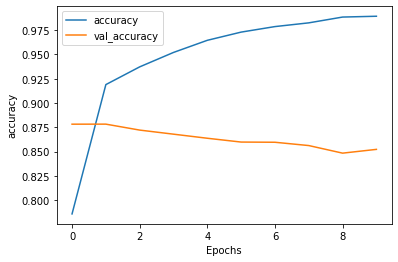

In [13]:
plot_graphs(history, 'accuracy')

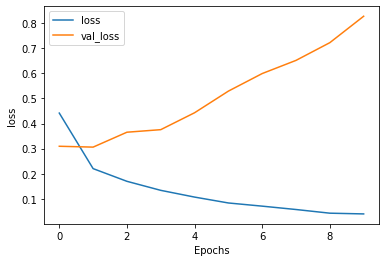

In [14]:
plot_graphs(history, 'loss')